In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
data = pd.read_csv('./parkinsons.data')

In [2]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['name', 'status'], axis=1), data['status'], test_size=.2, random_state=7)

In [3]:
bst = XGBClassifier(n_estimators=100, max_depth=20, learning_rate=0.4, objective='binary:logistic')

bst.fit(X_train, y_train)

preds = bst.predict(X_test)
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



In [12]:
print('ROC AUC метрика')
roc_auc_score(y_test, preds)

ROC AUC метрика


0.9285714285714286

Text(0.5, 1.0, 'Матрица ошибок')

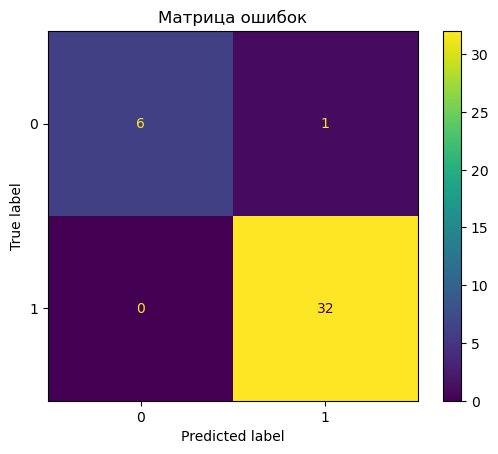

In [5]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=ax)
ax.set_title("Матрица ошибок")